![gif url](https://media0.giphy.com/media/l0F1y9sxEaXr66QzTx/giphy.gif?cid=6c09b952404f2yiu1an9yrsdi7nszgxflwqagber5xkg77z0&ep=v1_stickers_related&rid=giphy.gif&ct=s)

<center>
  <h1 style="
      background: linear-gradient(45deg, #ff6347, #ffd700);
      color: #2c3e50;
      font-size: 40px;
      font-weight: bold;
      font-family: 'Arial', sans-serif;
      border: 4px solid #2c3e50;
      padding: 25px;
      border-radius: 15px;
      box-shadow: 0 8px 12px rgba(0, 0, 0, 0.2);
      margin: 30px 0;
  ">Large Scale Arabic Book Reviews</h1>
</center>
Table of contents:

* [Introduction](#0)
* [Import Libraries](#1)
* [Read Data](#2)
* [Polarity Classification](#222)
* [Visualization Of Dataset](#3)
* [Data Pre-processing ](#4)
* [Feature Extraction](#5)
* [Balanced Polarity Classification](#6)
* [Data Splitting](#7)
* [CNN Model](#8)
    * [CNN With BOW](#8.1)
        * [Evaluation](#8.1.1)
    * [CNN With TFIDF](#8.2)
        * [Evaluation](#8.2.1)
    * [CNN With Word Embeddings](#8.3)
        * [Evaluation](#8.3.1)
* [LSTM Model](#9)
    * [LSTM With BOW](#9.1)
        * [Evaluation](#9.1.1)
    * [LSTM With TFIDF](#9.2)
        * [Evaluation](#9.2.1)
    * [LSTM With Word Embeddings](#9.3)
        * [Evaluation](#9.3.1)

<center>
   <a id="0"></a>
  <h1 style="
      background: linear-gradient(45deg, #ff6347, #ffd700);
      color: #2c3e50;
      font-size: 40px;
      font-weight: bold;
      font-family: 'Arial', sans-serif;
      border: 4px solid #2c3e50;
      padding: 25px;
      border-radius: 15px;
      box-shadow: 0 8px 12px rgba(0, 0, 0, 0.2);
      margin: 30px 0;
  ">Introduction</h1>
</center>

LABR (Large-Scale Arabic Book Reviews)
LABR is a large sentiment analysis dataset for the Arabic language. 
It consists of over 63,000 book reviews, each rated on a scale of 1 to 5 stars.


<center>
   <a id="1"></a>
  <h1 style="
      background: linear-gradient(45deg, #ff6347, #ffd700);
      color: #2c3e50;
      font-size: 40px;
      font-weight: bold;
      font-family: 'Arial', sans-serif;
      border: 4px solid #2c3e50;
      padding: 25px;
      border-radius: 15px;
      box-shadow: 0 8px 12px rgba(0, 0, 0, 0.2);
      margin: 30px 0;
  ">Import Libraries</h1>
</center>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import ISRIStemmer
from nltk.tokenize import word_tokenize
import nltk
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.callbacks import EarlyStopping,ModelCheckpoint
import tensorflow as tf
import keras
from gensim.models import Word2Vec
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from keras.preprocessing.text import Tokenizer
from keras.layers import MaxPooling1D, Dropout,Flatten,Conv1D,Dense,Embedding,SpatialDropout1D,LSTM
from imblearn.over_sampling import SMOTE
nltk.download('punkt')
nltk.download('stopwords')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<center>
   <a id="2"></a>
  <h1 style="
      background: linear-gradient(45deg, #ff6347, #ffd700);
      color: #2c3e50;
      font-size: 40px;
      font-weight: bold;
      font-family: 'Arial', sans-serif;
      border: 4px solid #2c3e50;
      padding: 25px;
      border-radius: 15px;
      box-shadow: 0 8px 12px rgba(0, 0, 0, 0.2);
      margin: 30px 0;
  ">Read Data</h1>
</center>

In [2]:
data=pd.read_csv('/kaggle/input/labr-dataset/reviews.tsv.txt',delimiter='\t',header=None,usecols=[0,4])
data.columns=['label','text']
data.head()

,label,text
0,4,"""عزازيل الذي صنعناه ،الكامن في أنفسنا"" يذكرني..."
1,4,من أمتع ما قرأت من روايات بلا شك. وحول الشك ت...
2,4,رواية تتخذ من التاريخ ،جوًا لها اختار المؤلف ...
3,1,إني أقدّر هذه الرواية كثيرا، لسبب مختلف عن أس...
4,5,الكاهن الذي أطلق على نفسه اسم هيبا تيمنا بالع...


In [3]:
data.shape

(63257, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63257 entries, 0 to 63256
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   63257 non-null  int64 
 1   text    63257 non-null  object
dtypes: int64(1), object(1)
memory usage: 988.5+ KB


In [5]:
data.isna().sum()

label    0
text     0
dtype: int64

<center>
   <a id="222"></a>
  <h1 style="
      background: linear-gradient(45deg, #ff6347, #ffd700);
      color: #2c3e50;
      font-size: 40px;
      font-weight: bold;
      font-family: 'Arial', sans-serif;
      border: 4px solid #2c3e50;
      padding: 25px;
      border-radius: 15px;
      box-shadow: 0 8px 12px rgba(0, 0, 0, 0.2);
      margin: 30px 0;
  ">Polarity Classification</h1>
</center>

We consider as positive reviews those with ratings 4 or 5, and negative reviews those with ratings 1 or 2. Reviews with rating 3 are considered neutral and not included in the polarity classification. The number of positive reviews is much larger than that of negative reviews. We believe this is because the books we got reviews for were the most popular books, and the top-rated ones had many more reviews than the least popular books.

In [6]:
new_data=data[data['label']!=3]

In [7]:
new_data.shape

(51056, 2)

In [8]:
new_data['label'][new_data['label']==1]=0
new_data['label'][new_data['label']==2]=0
new_data['label'][new_data['label']==4]=1
new_data['label'][new_data['label']==5]=1

/tmp/ipykernel_26/2606954946.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['label'][new_data['label']==1]=0
/tmp/ipykernel_26/2606954946.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['label'][new_data['label']==2]=0
/tmp/ipykernel_26/2606954946.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['label'][new_data['label']==4]=1
/tmp/ipykernel_26/2606954946.py:4: SettingWithCopyWarning: 
A value is

<center>
   <a id="3"></a>
  <h1 style="
      background: linear-gradient(45deg, #ff6347, #ffd700);
      color: #2c3e50;
      font-size: 40px;
      font-weight: bold;
      font-family: 'Arial', sans-serif;
      border: 4px solid #2c3e50;
      padding: 25px;
      border-radius: 15px;
      box-shadow: 0 8px 12px rgba(0, 0, 0, 0.2);
      margin: 30px 0;
  ">Visualization Of Dataset</h1>
</center>

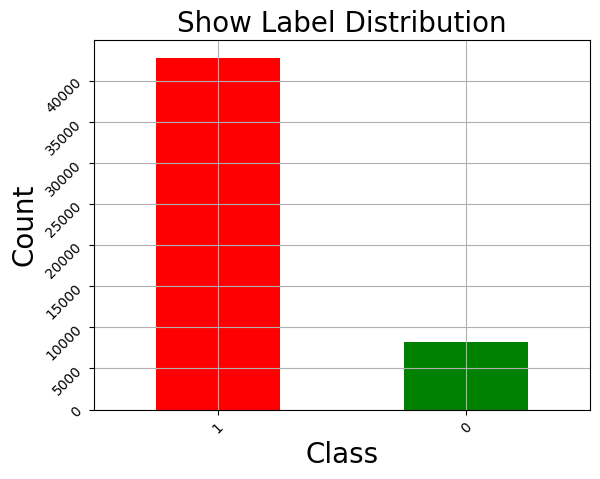

In [9]:
new_data.label.value_counts().plot.bar(color=['r','g','y'])
plt.title('Show Label Distribution',fontsize=20)
plt.xlabel('Class',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

<center>
   <a id="4"></a>
  <h1 style="
      background: linear-gradient(45deg, #ff6347, #ffd700);
      color: #2c3e50;
      font-size: 40px;
      font-weight: bold;
      font-family: 'Arial', sans-serif;
      border: 4px solid #2c3e50;
      padding: 25px;
      border-radius: 15px;
      box-shadow: 0 8px 12px rgba(0, 0, 0, 0.2);
      margin: 30px 0;
  ">Data Pre-processing</h1>
</center>

Implement data pre-processing (stop words, stemming, normalization, tokenization).

In [10]:
stemmer= ISRIStemmer()
for i in ['يلعبون','العب','يلعب']:
    print(i,'->',stemmer.stem(i))

يلعبون -> لعب
العب -> لعب
يلعب -> لعب


In [11]:
def pre_processing(text):
    # Tokenize the text into words
    words = word_tokenize(text)
    # Remove Arabic stopwords
    arabic_stopwords = set(stopwords.words("arabic"))
    tokens_words = [word for word in words if word not in arabic_stopwords]
    # Initialize an ISRI stemmer for Arabic
    stemmer = ISRIStemmer()
    stemmed_words = [stemmer.stem(word) for word in tokens_words]
    filtered_text = ' '.join(stemmed_words)
    #norm
    # Remove diacritics
    text = re.sub(r'[\u0617-\u061A\u064B-\u0652]', '',filtered_text)
    # Normalize spaces (replace various space characters with a standard space)
    text = re.sub(r'[\s\u2000-\u200D\u2028\u2029\u202F\u205F\u3000]+', ' ', text)
    # Remove digits
    text_without_digits = re.sub(r'\d', '',text)
    # Remove punctuation using regular expressions
    filtered_words =re.sub(r'[^\w\s]','', text_without_digits)
    return filtered_words

In [12]:
new_data['text'][0]

' "عزازيل الذي صنعناه ،الكامن في أنفسنا" يذكرني يوسف زيدان بــ بورخس في استخدامه لحيلته الفنية،وخداع القاريء بأن الرواية ترجمة لمخطوط قديم. الهوامش المخترعة و اختلاق وجود مترجـِم عاد بي إلى بورخس و هوامشه و كتَّابه الوهميين. هذه أولى قراءاتي ليوسف زيدان ،وهو عبقري في السرد ويخلقُ جوَّا ساحرا متفرداً يغرقك في المتعة. هُنا يتجلى الشكُّ الراقي الممزوج بانسانية هيبا الفاتنة ربما تم تناول فكرة الرواية قبلاً ،ولكن هنا تفرداً و عذوبة لا تُقارن بنصٍ آخر كنتُ أودُّ لو صيغت النهاية بطريقة مختلفة فقد جاءت باردة لا تتناسب مع رواية خُطَّت بهذا الشغف . ولذا لا أستطيع منح الرواية خمس نجوم ،وإن كانت تجربة قرائية متفردة وممتعة. '

In [13]:
pre_processing(new_data['text'][0])

' عزازيل صنع الكام نفس  ذكر وسف زيد بــ رخس استخدامه لحل فنيةوخداع قاريء بأن روي رجم خطط قدم  همش خرع خلق وجد رجـم رخس همش كتب وهم  ولى قرء وسف زيد وهو عبقر سرد خلق جوا سحر تفرد غرق تعة  هنا جلى الش رقي مزج بانسانية هيب فتن ربم تم نول فكر روي قبل ول فرد عذب قرن بنص اخر كنت اود صيغ نهي طرق خلف فقد جءت برد نسب روي خطت بهذا شغف  ولذ طيع منح روي نجم وإ كانت جرب قري تفرد متع '

In [14]:
new_data['text']=new_data['text'].apply(pre_processing)
new_data.head()

/tmp/ipykernel_26/2802461615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['text']=new_data['text'].apply(pre_processing)


,label,text
0,1,عزازيل صنع الكام نفس ذكر وسف زيد بــ رخس است...
1,1,متع قرأ روي بلا شك وحل الش دند عزازيل بلا ه...
2,1,روي تخذ ارخ جا خار ؤلف فتر ارخ ندر نول روئ كت...
3,0,اني قدر روي كثيرا سبب خلف سبب خرين انه علم درس...
4,1,كهن طلق نفس اسم هيب تيم علم وثن هيب فر قرت وشت...


<center>
   <a id="5"></a>
  <h1 style="
      background: linear-gradient(45deg, #ff6347, #ffd700);
      color: #2c3e50;
      font-size: 40px;
      font-weight: bold;
      font-family: 'Arial', sans-serif;
      border: 4px solid #2c3e50;
      padding: 25px;
      border-radius: 15px;
      box-shadow: 0 8px 12px rgba(0, 0, 0, 0.2);
      margin: 30px 0;
  ">Feature Extraction</h1>
</center>

Feature Extraction	Implement feature extraction methods (BoW, TF-IDF, word embeddings).
Evaluate the effectiveness of different feature extraction techniques.


In [15]:
def feature_f(method='tfidf'):
    token=Tokenizer(num_words=200)
    token.fit_on_texts(new_data['text'])
    if method=='tfidf':
        feature=token.texts_to_matrix(new_data['text'],mode='tfidf')
        return feature
    elif method=='bow':
        feature=token.texts_to_matrix(new_data['text'],mode='count')
        return feature 
    else:
        sentences = [text.split() for text in new_data['text']]
        word2vec_model = Word2Vec(sentences, vector_size=200)
        feature = np.array([np.mean([word2vec_model.wv[word] for word in sentence if word in word2vec_model.wv] 
                                    or [np.zeros(200)], axis=0) for sentence in new_data['text']])
        return feature

<center>
   <a id="6"></a>
  <h1 style="
      background: linear-gradient(45deg, #ff6347, #ffd700);
      color: #2c3e50;
      font-size: 40px;
      font-weight: bold;
      font-family: 'Arial', sans-serif;
      border: 4px solid #2c3e50;
      padding: 25px;
      border-radius: 15px;
      box-shadow: 0 8px 12px rgba(0, 0, 0, 0.2);
      margin: 30px 0;
  ">Balanced Polarity Classification</h1>
</center>

The number of positive reviews is much larger than that of negative reviews. Using Over-sampling: Increase the size of the minority class by replicating or creating synthetic samples.

In [16]:
def smote(feature):
    smote=SMOTE()
    feature,label=smote.fit_resample(feature,new_data['label'])
    return feature,label

<center>
   <a id="7"></a>
  <h1 style="
      background: linear-gradient(45deg, #ff6347, #ffd700);
      color: #2c3e50;
      font-size: 40px;
      font-weight: bold;
      font-family: 'Arial', sans-serif;
      border: 4px solid #2c3e50;
      padding: 25px;
      border-radius: 15px;
      box-shadow: 0 8px 12px rgba(0, 0, 0, 0.2);
      margin: 30px 0;
  ">Data Splitting</h1>
</center>

Split Data
•	Train 70%
•	Test   30%


In [17]:
def split(feature,label):
    X_train, X_test, y_train, y_test = train_test_split(feature,label, test_size=0.30
                                                    , random_state=44, shuffle =True,stratify=label)
    print('X_train shape is ' , X_train.shape)
    print('X_test shape is ' , X_test.shape)
    print('y_train shape is ' , y_train.shape)
    print('y_test shape is ' , y_test.shape)
    return X_train,X_test,y_train,y_test

<center>
   <a id="8"></a>
  <h1 style="
      background: linear-gradient(45deg, #ff6347, #ffd700);
      color: #2c3e50;
      font-size: 40px;
      font-weight: bold;
      font-family: 'Arial', sans-serif;
      border: 4px solid #2c3e50;
      padding: 25px;
      border-radius: 15px;
      box-shadow: 0 8px 12px rgba(0, 0, 0, 0.2);
      margin: 30px 0;
  ">CNN Model</h1>
</center>

In [18]:
def CNN(X_train):
    model = Sequential()
    model.add(Conv1D(64,11, activation='relu',input_shape=(X_train.shape[1],1)))
    model.add(MaxPooling1D())
    model.add(Dropout(.5))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer ='adam', loss='binary_crossentropy',
                  metrics=['accuracy'])
    print(model.summary())
    return model

<center>
   <a id="8.1"></a>
  <h1 style="
      background: linear-gradient(45deg, #ff6347, #ffd700);
      color: #2c3e50;
      font-size: 40px;
      font-weight: bold;
      font-family: 'Arial', sans-serif;
      border: 4px solid #2c3e50;
      padding: 25px;
      border-radius: 15px;
      box-shadow: 0 8px 12px rgba(0, 0, 0, 0.2);
      margin: 30px 0;
  ">CNN With BOW</h1>
</center>

In [19]:
feature=feature_f('bow')
feature

array([[0., 1., 4., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 2., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [20]:
feature,label=smote(feature)

In [21]:
X_train,X_test,y_train,y_test=split(feature,label)

X_train shape is  (59964, 200)
X_test shape is  (25700, 200)
y_train shape is  (59964,)
y_test shape is  (25700,)


In [22]:
b_model=CNN(X_train)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 190, 64)           768       
                                                                 
 max_pooling1d (MaxPooling1  (None, 95, 64)            0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 95, 64)            0         
                                                                 
 flatten (Flatten)           (None, 6080)              0         
                                                                 
 dense (Dense)               (None, 256)               1556736   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                        

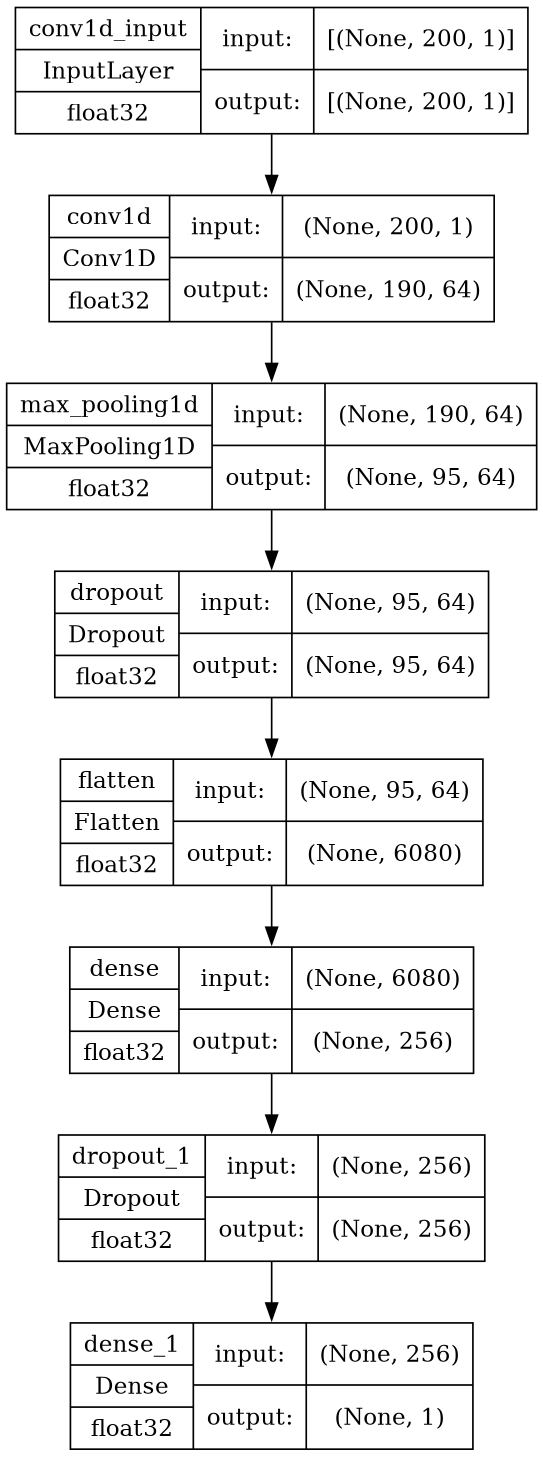

In [23]:
tf.keras.utils.plot_model(b_model, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=120)

In [24]:
checkpoint_cb =ModelCheckpoint('BOW_CNN.h5',monitor='val_loss', save_best_only=True)
early_stopping_cb =EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
hist=b_model.fit(X_train,y_train,batch_size=32,epochs=20,validation_split=.2,callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 16s 4ms/step - loss: 0.5155 - accuracy: 0.7477 - val_loss: 0.4279 - val_accuracy: 0.8005
Epoch 2/20
  27/1500 [..............................] - ETA: 5s - loss: 0.4522 - accuracy: 0.7662

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 6s 4ms/step - loss: 0.4341 - accuracy: 0.7945 - val_loss: 0.3840 - val_accuracy: 0.8226
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4006 - accuracy: 0.8108 - val_loss: 0.3772 - val_accuracy: 0.8258
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3815 - accuracy: 0.8228 - val_loss: 0.3687 - val_accuracy: 0.8331
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3621 - accuracy: 0.8313 - val_loss: 0.3861 - val_accuracy: 0.8114
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3484 - accuracy: 0.8388 - val_loss: 0.3407 - val_accuracy: 0.8482
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3344 - accuracy: 0.8472 - val_loss: 0.3263 - val_accuracy: 0.8527
Epoch 8/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3198 - accuracy: 0.8554 - val_loss: 0.3178 - val_accuracy: 0.8623
Epo

<center>
   <a id="8.1.1"></a>
  <h1 style="
      background: linear-gradient(45deg, #ff6347, #ffd700);
      color: #2c3e50;
      font-size: 40px;
      font-weight: bold;
      font-family: 'Arial', sans-serif;
      border: 4px solid #2c3e50;
      padding: 25px;
      border-radius: 15px;
      box-shadow: 0 8px 12px rgba(0, 0, 0, 0.2);
      margin: 30px 0;
  ">Evaluation</h1>
</center>

Evaluate the system using metrics like accuracy, precision, recall, and F1-score.

In [25]:
def hist_f():
    hist_=pd.DataFrame(hist.history)
    return hist_
def draw_hist():
    hist_=hist_f()
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.plot(hist_['loss'],label='Train_Loss')
    plt.plot(hist_['val_loss'],label='Validation_Loss')
    plt.title('Train_Loss & Validation_Loss',fontsize=20)
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(hist_['accuracy'],label='Train_Accuracy')
    plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
    plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
    plt.legend()
    plt.show()
def evaluate(model):
    y_pred=model.predict(X_test)
    y_pred_=np.where(y_pred>=.5,1,0)
    AccScore = accuracy_score(y_test, y_pred_)
    print('Accuracy Score is : ', AccScore)
    F1Score = f1_score(y_test, y_pred_, average='micro')
    print('F1 Score is : ', F1Score)
    RecallScore = recall_score(y_test, y_pred_, average='micro')
    print('Recall Score is : ', RecallScore)
    PrecisionScore = precision_score(y_test, y_pred_, average='micro')
    print('Precision Score is : ', PrecisionScore)

In [26]:
hist_f()

,loss,accuracy,val_loss,val_accuracy
0,0.515468,0.747660,0.427901,0.800467
1,0.434086,0.794480,0.383998,0.822563
2,0.400635,0.810802,0.377243,0.825815
3,0.381482,0.822789,0.368685,0.833069
4,0.362146,0.831273,0.386052,0.811390
5,0.348383,0.838757,0.340672,0.848245
6,0.334380,0.847199,0.326315,0.852747
7,0.319806,0.855350,0.317756,0.862336
8,0.312562,0.858143,0.319172,0.858001
9,0.304604,0.861812,0.321241,0.860002


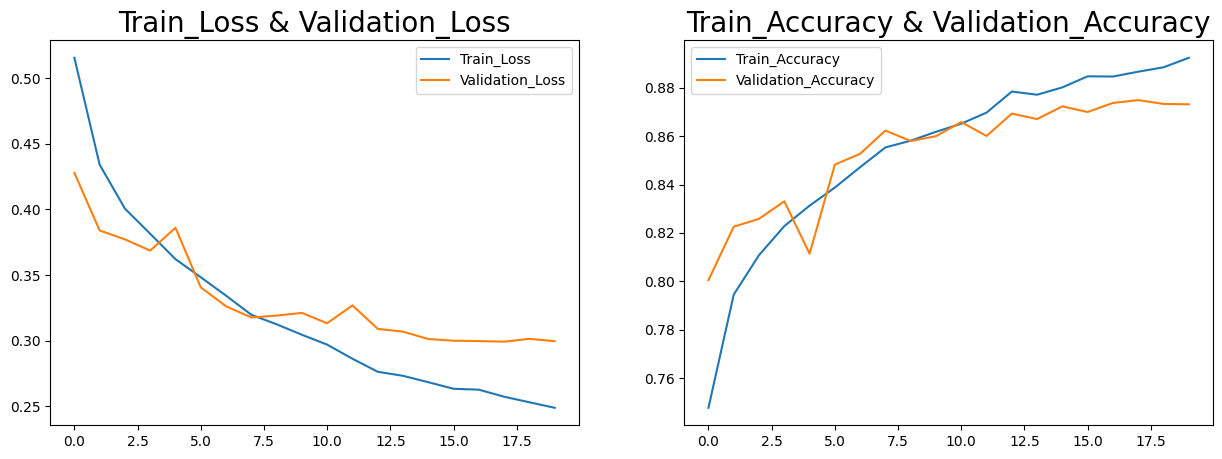

In [27]:
draw_hist()

In [28]:
evaluate(b_model)

804/804 [==============================] - 1s 2ms/step
Accuracy Score is :  0.8723346303501945
F1 Score is :  0.8723346303501945
Recall Score is :  0.8723346303501945
Precision Score is :  0.8723346303501945


<center>
   <a id="8.2"></a>
  <h1 style="
      background: linear-gradient(45deg, #ff6347, #ffd700);
      color: #2c3e50;
      font-size: 40px;
      font-weight: bold;
      font-family: 'Arial', sans-serif;
      border: 4px solid #2c3e50;
      padding: 25px;
      border-radius: 15px;
      box-shadow: 0 8px 12px rgba(0, 0, 0, 0.2);
      margin: 30px 0;
  ">CNN With TFIDF</h1>
</center>

In [29]:
feature=feature_f()
feature

array([[0.        , 1.07189693, 3.7713827 , ..., 0.        , 3.45112611,
        0.        ],
       [0.        , 0.        , 1.58043482, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.07189693, 2.67590876, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.07189693, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [30]:
feature,label=smote(feature)

In [31]:
X_train,X_test,y_train,y_test=split(feature,label)

X_train shape is  (59964, 200)
X_test shape is  (25700, 200)
y_train shape is  (59964,)
y_test shape is  (25700,)


In [32]:
t_model=CNN(X_train)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 190, 64)           768       
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 95, 64)            0         
 g1D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 95, 64)            0         
                                                                 
 flatten_1 (Flatten)         (None, 6080)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               1556736   
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                      

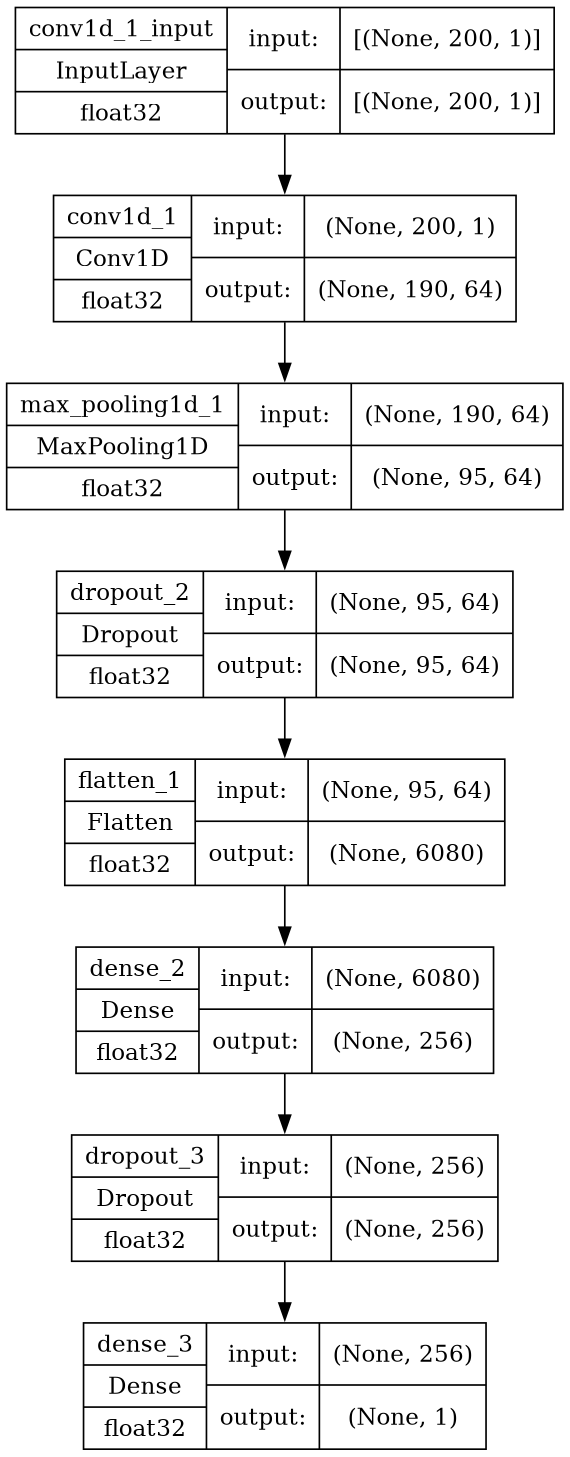

In [33]:
tf.keras.utils.plot_model(t_model, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=120)

In [34]:
checkpoint_cb =ModelCheckpoint('tfidf_CNN.h5',monitor='val_loss', save_best_only=True)
early_stopping_cb =EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
hist=t_model.fit(X_train,y_train,batch_size=32,epochs=20,validation_split=.2,callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5131 - accuracy: 0.7448 - val_loss: 0.4091 - val_accuracy: 0.8111
Epoch 2/20
  31/1500 [..............................] - ETA: 4s - loss: 0.4385 - accuracy: 0.7964

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 6s 4ms/step - loss: 0.4354 - accuracy: 0.7921 - val_loss: 0.3834 - val_accuracy: 0.8266
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4026 - accuracy: 0.8094 - val_loss: 0.3753 - val_accuracy: 0.8294
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3801 - accuracy: 0.8211 - val_loss: 0.3702 - val_accuracy: 0.8266
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3633 - accuracy: 0.8304 - val_loss: 0.3414 - val_accuracy: 0.8405
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3463 - accuracy: 0.8398 - val_loss: 0.3319 - val_accuracy: 0.8484
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3337 - accuracy: 0.8472 - val_loss: 0.3265 - val_accuracy: 0.8561
Epoch 8/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3219 - accuracy: 0.8534 - val_loss: 0.3247 - val_accuracy: 0.8595
Epo

<center>
   <a id="8.2.1"></a>
  <h1 style="
      background: linear-gradient(45deg, #ff6347, #ffd700);
      color: #2c3e50;
      font-size: 40px;
      font-weight: bold;
      font-family: 'Arial', sans-serif;
      border: 4px solid #2c3e50;
      padding: 25px;
      border-radius: 15px;
      box-shadow: 0 8px 12px rgba(0, 0, 0, 0.2);
      margin: 30px 0;
  ">Evaluation</h1>
</center>

In [35]:
hist_f()

,loss,accuracy,val_loss,val_accuracy
0,0.513122,0.744783,0.409144,0.811056
1,0.435449,0.792104,0.383431,0.826566
2,0.402603,0.809427,0.375333,0.829400
3,0.380054,0.821059,0.370194,0.826649
4,0.363311,0.830398,0.341372,0.840490
5,0.346323,0.839778,0.331900,0.848412
6,0.333697,0.847220,0.326487,0.856083
7,0.321906,0.853411,0.324714,0.859501
8,0.307442,0.859373,0.309330,0.865838
9,0.302394,0.862771,0.323419,0.864004


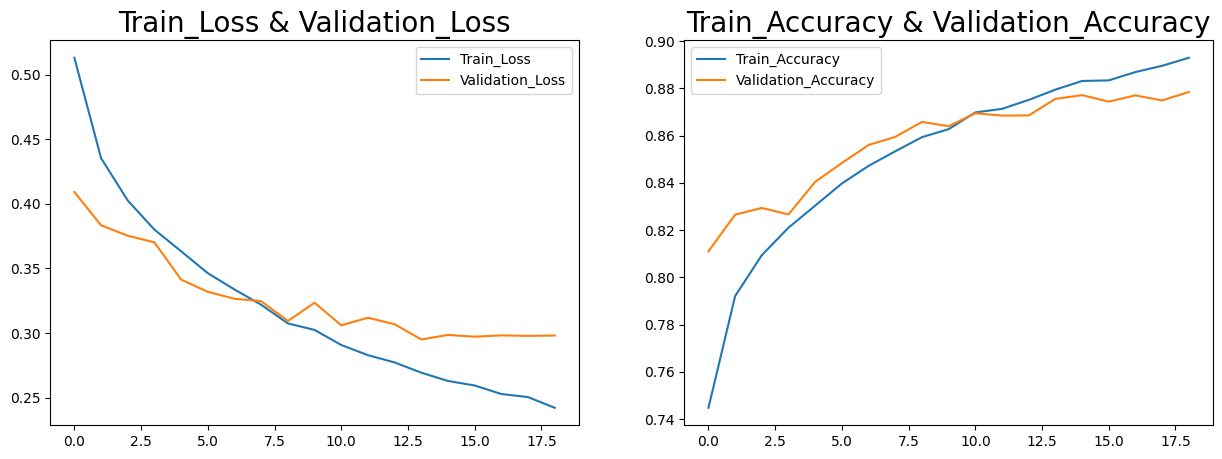

In [36]:
draw_hist()

In [37]:
evaluate(t_model)

804/804 [==============================] - 1s 2ms/step
Accuracy Score is :  0.8709727626459144
F1 Score is :  0.8709727626459145
Recall Score is :  0.8709727626459144
Precision Score is :  0.8709727626459144


<center>
   <a id="8.3"></a>
  <h1 style="
      background: linear-gradient(45deg, #ff6347, #ffd700);
      color: #2c3e50;
      font-size: 40px;
      font-weight: bold;
      font-family: 'Arial', sans-serif;
      border: 4px solid #2c3e50;
      padding: 25px;
      border-radius: 15px;
      box-shadow: 0 8px 12px rgba(0, 0, 0, 0.2);
      margin: 30px 0;
  ">CNN With Word Embeddings</h1>
</center>

In [38]:
feature=feature_f('word')
feature

array([[ 0.0166047 ,  0.02151144,  0.03214257, ..., -0.03514259,
        -0.02477619,  0.00047457],
       [ 0.01549405,  0.05511113,  0.03068612, ..., -0.04220713,
         0.00058751, -0.01625454],
       [ 0.02409398,  0.03099014,  0.02104376, ..., -0.04549801,
        -0.01869592, -0.00060431],
       ...,
       [ 0.00338898,  0.00949686,  0.04451664, ..., -0.03966235,
         0.00615428, -0.02420805],
       [ 0.03254597,  0.05076697,  0.02117643, ..., -0.04978045,
        -0.03076428,  0.01307231],
       [ 0.00745839,  0.02217836,  0.02946757, ..., -0.02992824,
        -0.0405974 , -0.00274189]])

In [39]:
feature,label=smote(feature)

In [40]:
X_train,X_test,y_train,y_test=split(feature,label)

X_train shape is  (59964, 200)
X_test shape is  (25700, 200)
y_train shape is  (59964,)
y_test shape is  (25700,)


In [41]:
w_model=CNN(X_train)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 190, 64)           768       
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 95, 64)            0         
 g1D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 95, 64)            0         
                                                                 
 flatten_2 (Flatten)         (None, 6080)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               1556736   
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                      

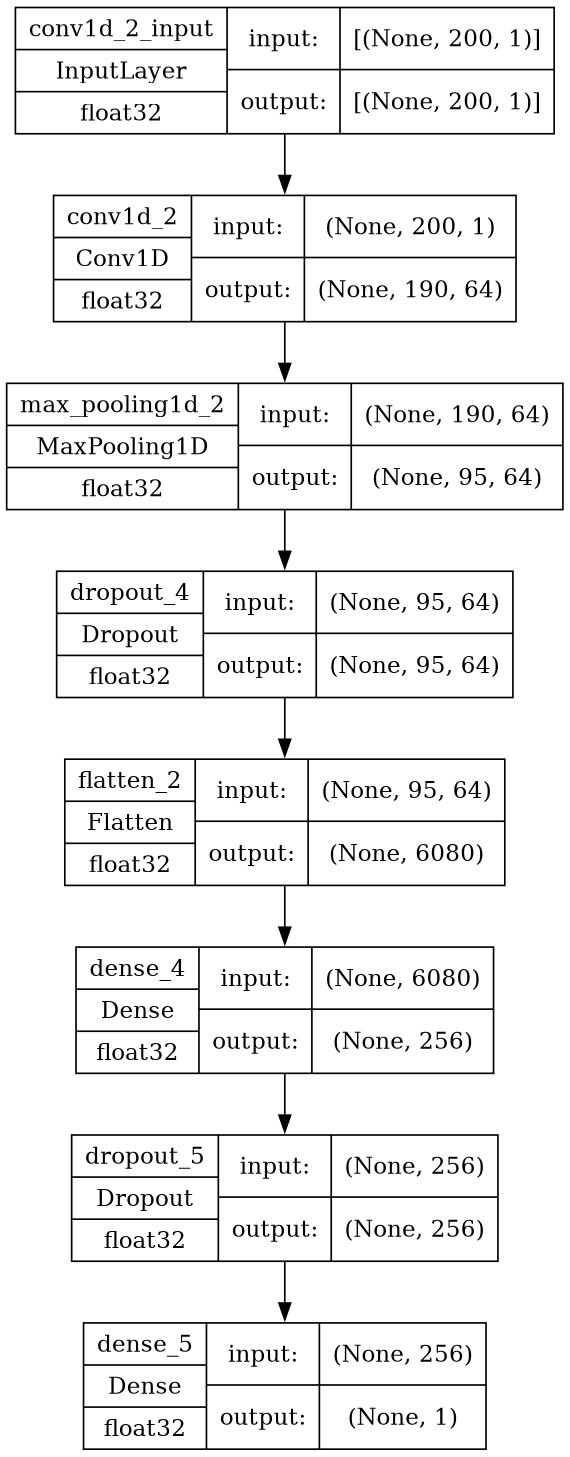

In [42]:
tf.keras.utils.plot_model(w_model, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=120)

In [43]:
checkpoint_cb =ModelCheckpoint('Word_CNN.h5',monitor='val_loss', save_best_only=True)
early_stopping_cb =EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
hist=w_model.fit(X_train,y_train,batch_size=32,epochs=20,validation_split=.2,callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.6931 - accuracy: 0.5060 - val_loss: 0.6916 - val_accuracy: 0.5338
Epoch 2/20
  32/1500 [..............................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5205

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 6s 4ms/step - loss: 0.6913 - accuracy: 0.5235 - val_loss: 0.6886 - val_accuracy: 0.5492
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6884 - accuracy: 0.5384 - val_loss: 0.6839 - val_accuracy: 0.5696
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6861 - accuracy: 0.5459 - val_loss: 0.6808 - val_accuracy: 0.5704
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6829 - accuracy: 0.5538 - val_loss: 0.6807 - val_accuracy: 0.5709
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6819 - accuracy: 0.5569 - val_loss: 0.6774 - val_accuracy: 0.5805
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6811 - accuracy: 0.5589 - val_loss: 0.6773 - val_accuracy: 0.5677
Epoch 8/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6806 - accuracy: 0.5607 - val_loss: 0.6817 - val_accuracy: 0.5682
Epo

<center>
   <a id="8.3.1"></a>
  <h1 style="
      background: linear-gradient(45deg, #ff6347, #ffd700);
      color: #2c3e50;
      font-size: 40px;
      font-weight: bold;
      font-family: 'Arial', sans-serif;
      border: 4px solid #2c3e50;
      padding: 25px;
      border-radius: 15px;
      box-shadow: 0 8px 12px rgba(0, 0, 0, 0.2);
      margin: 30px 0;
  ">Evaluation</h1>
</center>

In [44]:
hist_f()

,loss,accuracy,val_loss,val_accuracy
0,0.693098,0.506014,0.691628,0.533811
1,0.691256,0.523462,0.688625,0.549154
2,0.688363,0.538367,0.683900,0.569582
3,0.686085,0.545871,0.680760,0.570416
4,0.682896,0.553793,0.680690,0.570916
5,0.681949,0.556941,0.677411,0.580505
6,0.681110,0.558879,0.677345,0.567664
7,0.680553,0.560714,0.681695,0.568248
8,0.679080,0.564049,0.675781,0.566497
9,0.678529,0.567593,0.673521,0.583674


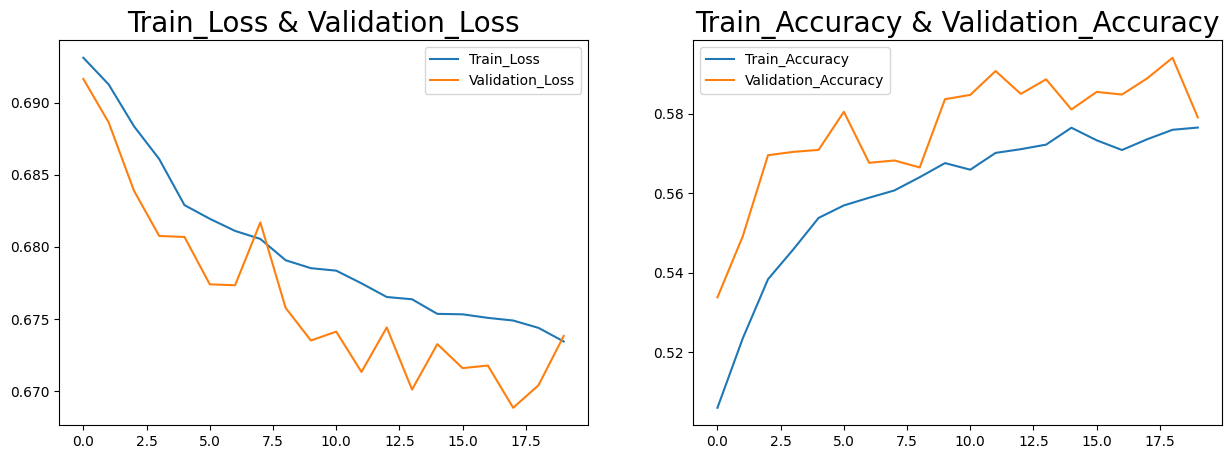

In [45]:
draw_hist()

In [46]:
evaluate(w_model)

804/804 [==============================] - 1s 1ms/step
Accuracy Score is :  0.5798054474708171
F1 Score is :  0.5798054474708171
Recall Score is :  0.5798054474708171
Precision Score is :  0.5798054474708171


<center>
   <a id="9"></a>
  <h1 style="
      background: linear-gradient(45deg, #ff6347, #ffd700);
      color: #2c3e50;
      font-size: 40px;
      font-weight: bold;
      font-family: 'Arial', sans-serif;
      border: 4px solid #2c3e50;
      padding: 25px;
      border-radius: 15px;
      box-shadow: 0 8px 12px rgba(0, 0, 0, 0.2);
      margin: 30px 0;
  ">LSTM Model</h1>
</center>

In [47]:
def LSTM_f(X_train):
    model = Sequential()
    model.add(Embedding(input_dim=X_train.shape[1], output_dim=64, input_length=X_train.shape[1]))
    model.add(LSTM(32, return_sequences=True))
    model.add(SpatialDropout1D(rate=0.2))  
    model.add(LSTM(32))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer ='adam', loss='binary_crossentropy',
                  metrics=['accuracy'])
    print(model.summary())
    return model

<center>
   <a id="9.1"></a>
  <h1 style="
      background: linear-gradient(45deg, #ff6347, #ffd700);
      color: #2c3e50;
      font-size: 40px;
      font-weight: bold;
      font-family: 'Arial', sans-serif;
      border: 4px solid #2c3e50;
      padding: 25px;
      border-radius: 15px;
      box-shadow: 0 8px 12px rgba(0, 0, 0, 0.2);
      margin: 30px 0;
  ">LSTM With BOW</h1>
</center>

In [48]:
feature=feature_f('bow')
feature

array([[0., 1., 4., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 2., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [49]:
feature,label=smote(feature)

In [50]:
X_train,X_test,y_train,y_test=split(feature,label)

X_train shape is  (59964, 200)
X_test shape is  (25700, 200)
y_train shape is  (59964,)
y_test shape is  (25700,)


In [51]:
b_model=LSTM_f(X_train)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 64)           12800     
                                                                 
 lstm (LSTM)                 (None, 200, 32)           12416     
                                                                 
 spatial_dropout1d (Spatial  (None, 200, 32)           0         
 Dropout1D)                                                      
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 33569 (131.13 KB)
Trainable params: 33569 (131.13 KB)
Non-trainable params: 0 (0.00 Byte)
________________

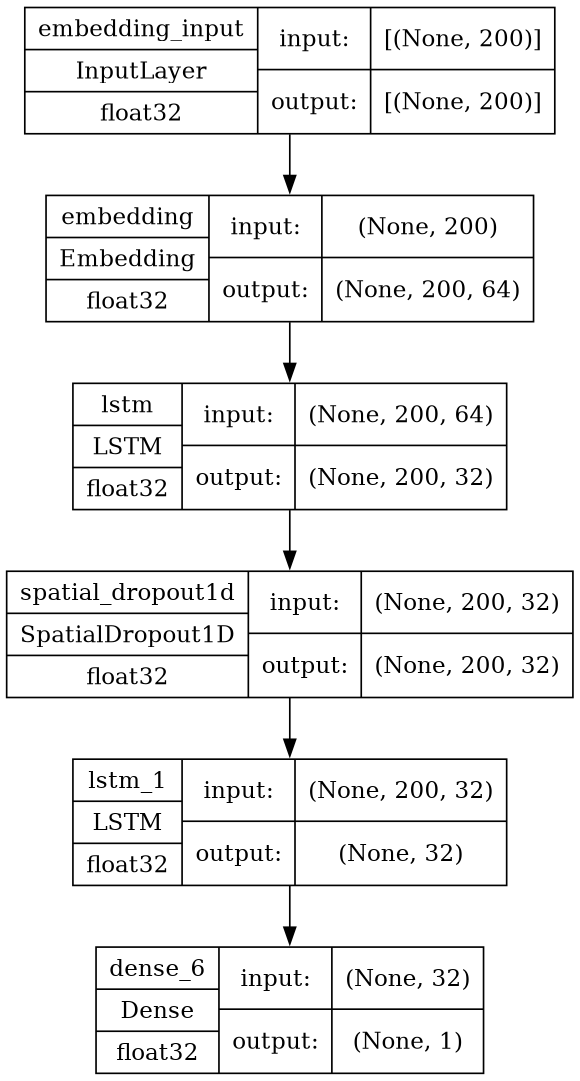

In [52]:
tf.keras.utils.plot_model(b_model, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=120)

In [53]:
checkpoint_cb =ModelCheckpoint('BOW_LSTM.h5',monitor='val_loss', save_best_only=True)
early_stopping_cb =EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
hist=b_model.fit(X_train,y_train,batch_size=32,epochs=20,validation_split=.2,callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 33s 19ms/step - loss: 0.6206 - accuracy: 0.6590 - val_loss: 0.5840 - val_accuracy: 0.7163
Epoch 2/20
   9/1500 [..............................] - ETA: 22s - loss: 0.5792 - accuracy: 0.7153

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 25s 16ms/step - loss: 0.5775 - accuracy: 0.7177 - val_loss: 0.5626 - val_accuracy: 0.7309
Epoch 3/20
1500/1500 [==============================] - 25s 17ms/step - loss: 0.5642 - accuracy: 0.7285 - val_loss: 0.5584 - val_accuracy: 0.7359
Epoch 4/20
1500/1500 [==============================] - 25s 17ms/step - loss: 0.5562 - accuracy: 0.7334 - val_loss: 0.5560 - val_accuracy: 0.7393
Epoch 5/20
1500/1500 [==============================] - 25s 16ms/step - loss: 0.5499 - accuracy: 0.7360 - val_loss: 0.5472 - val_accuracy: 0.7439
Epoch 6/20
1500/1500 [==============================] - 25s 17ms/step - loss: 0.5502 - accuracy: 0.7380 - val_loss: 0.5445 - val_accuracy: 0.7459
Epoch 7/20
1500/1500 [==============================] - 25s 17ms/step - loss: 0.5441 - accuracy: 0.7411 - val_loss: 0.5441 - val_accuracy: 0.7409
Epoch 8/20
1500/1500 [==============================] - 25s 17ms/step - loss: 0.5428 - accuracy: 0.7414 - val_loss: 0.5376 - val_accura

<center>
   <a id="9.1.1"></a>
  <h1 style="
      background: linear-gradient(45deg, #ff6347, #ffd700);
      color: #2c3e50;
      font-size: 40px;
      font-weight: bold;
      font-family: 'Arial', sans-serif;
      border: 4px solid #2c3e50;
      padding: 25px;
      border-radius: 15px;
      box-shadow: 0 8px 12px rgba(0, 0, 0, 0.2);
      margin: 30px 0;
  ">Evaluation</h1>
</center>

In [54]:
hist_f()

,loss,accuracy,val_loss,val_accuracy
0,0.620635,0.659023,0.583981,0.716335
1,0.577453,0.717663,0.562564,0.730926
2,0.564190,0.728503,0.558391,0.735929
3,0.556162,0.733360,0.555950,0.739348
4,0.549858,0.736028,0.547222,0.743851
5,0.550238,0.737967,0.544512,0.745935
6,0.544132,0.741114,0.544118,0.740932
7,0.542788,0.741427,0.537593,0.745768
8,0.540462,0.743116,0.538161,0.746185
9,0.536580,0.744617,0.531389,0.751021


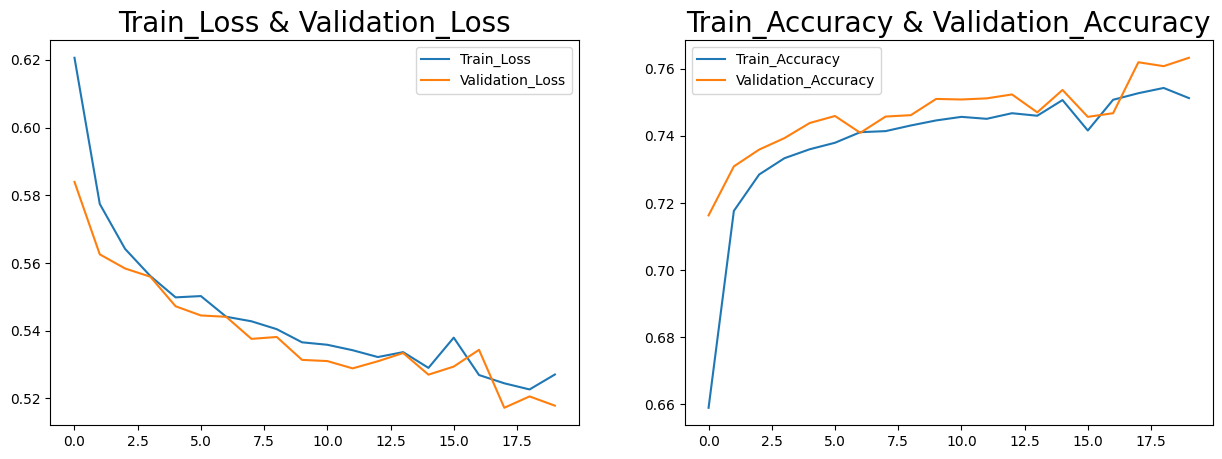

In [55]:
draw_hist()

In [56]:
evaluate(b_model)

804/804 [==============================] - 6s 6ms/step
Accuracy Score is :  0.760466926070039
F1 Score is :  0.760466926070039
Recall Score is :  0.760466926070039
Precision Score is :  0.760466926070039


<center>
   <a id="9.2"></a>
  <h1 style="
      background: linear-gradient(45deg, #ff6347, #ffd700);
      color: #2c3e50;
      font-size: 40px;
      font-weight: bold;
      font-family: 'Arial', sans-serif;
      border: 4px solid #2c3e50;
      padding: 25px;
      border-radius: 15px;
      box-shadow: 0 8px 12px rgba(0, 0, 0, 0.2);
      margin: 30px 0;
  ">LSTM With TFIDF</h1>
</center>

In [57]:
feature=feature_f()
feature

array([[0.        , 1.07189693, 3.7713827 , ..., 0.        , 3.45112611,
        0.        ],
       [0.        , 0.        , 1.58043482, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.07189693, 2.67590876, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.07189693, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [58]:
feature,label=smote(feature)

In [59]:
X_train,X_test,y_train,y_test=split(feature,label)

X_train shape is  (59964, 200)
X_test shape is  (25700, 200)
y_train shape is  (59964,)
y_test shape is  (25700,)


In [60]:
t_model=LSTM_f(X_train)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 64)           12800     
                                                                 
 lstm_2 (LSTM)               (None, 200, 32)           12416     
                                                                 
 spatial_dropout1d_1 (Spati  (None, 200, 32)           0         
 alDropout1D)                                                    
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 33569 (131.13 KB)
Trainable params: 33569 (131.13 KB)
Non-trainable params: 0 (0.00 Byte)
________________

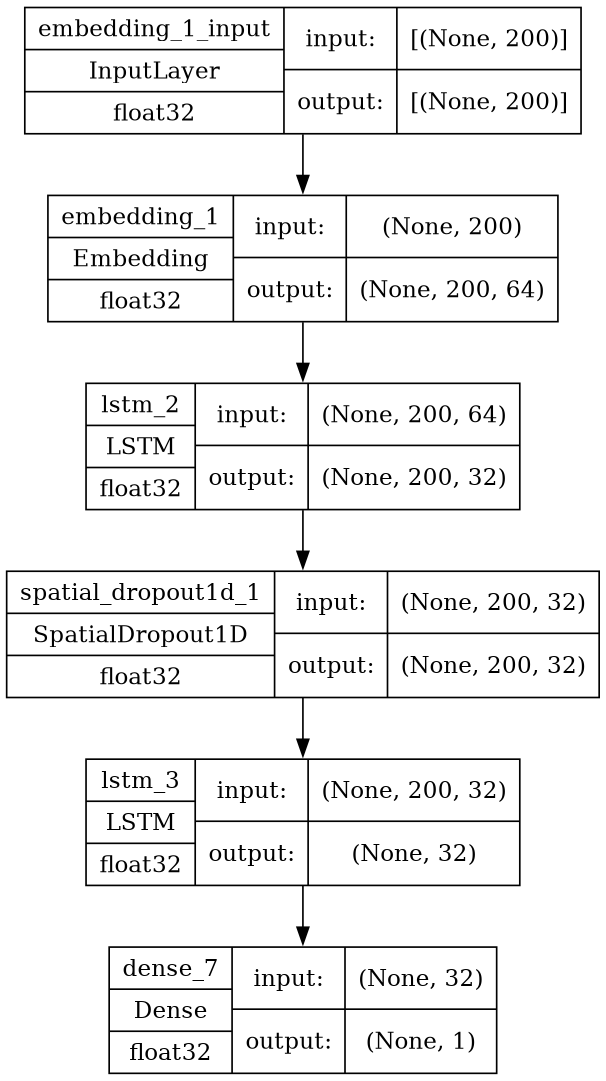

In [61]:
tf.keras.utils.plot_model(t_model, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=120)

In [62]:
checkpoint_cb =ModelCheckpoint('tfidf_LSTM.h5',monitor='val_loss', save_best_only=True)
early_stopping_cb =EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
hist=t_model.fit(X_train,y_train,batch_size=32,epochs=20,validation_split=.2,callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 31s 18ms/step - loss: 0.5460 - accuracy: 0.6788 - val_loss: 0.5047 - val_accuracy: 0.7085
Epoch 2/20
   7/1500 [..............................] - ETA: 26s - loss: 0.4524 - accuracy: 0.7366

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 25s 17ms/step - loss: 0.4864 - accuracy: 0.7329 - val_loss: 0.4882 - val_accuracy: 0.7406
Epoch 3/20
1500/1500 [==============================] - 25s 17ms/step - loss: 0.4983 - accuracy: 0.7256 - val_loss: 0.5117 - val_accuracy: 0.7114
Epoch 4/20
1500/1500 [==============================] - 25s 17ms/step - loss: 0.5023 - accuracy: 0.7290 - val_loss: 0.4788 - val_accuracy: 0.7548
Epoch 5/20
1500/1500 [==============================] - 25s 17ms/step - loss: 0.4739 - accuracy: 0.7585 - val_loss: 0.4617 - val_accuracy: 0.7658
Epoch 6/20
1500/1500 [==============================] - 25s 17ms/step - loss: 0.4639 - accuracy: 0.7623 - val_loss: 0.4545 - val_accuracy: 0.7686
Epoch 7/20
1500/1500 [==============================] - 25s 16ms/step - loss: 0.4593 - accuracy: 0.7635 - val_loss: 0.4520 - val_accuracy: 0.7718
Epoch 8/20
1500/1500 [==============================] - 25s 17ms/step - loss: 0.4568 - accuracy: 0.7641 - val_loss: 0.4604 - val_accura

<center>
   <a id="9.2.1"></a>
  <h1 style="
      background: linear-gradient(45deg, #ff6347, #ffd700);
      color: #2c3e50;
      font-size: 40px;
      font-weight: bold;
      font-family: 'Arial', sans-serif;
      border: 4px solid #2c3e50;
      padding: 25px;
      border-radius: 15px;
      box-shadow: 0 8px 12px rgba(0, 0, 0, 0.2);
      margin: 30px 0;
  ">Evaluation</h1>
</center>

In [63]:
hist_f()

,loss,accuracy,val_loss,val_accuracy
0,0.546000,0.678764,0.504685,0.708497
1,0.486434,0.732859,0.488241,0.740599
2,0.498279,0.725563,0.511729,0.711415
3,0.502321,0.729003,0.478842,0.754774
4,0.473911,0.758521,0.461686,0.765780
5,0.463936,0.762252,0.454475,0.768615
6,0.459268,0.763503,0.451953,0.771784
7,0.456760,0.764066,0.460448,0.763779
8,0.456376,0.763982,0.458391,0.764529
9,0.453681,0.764775,0.458036,0.762778


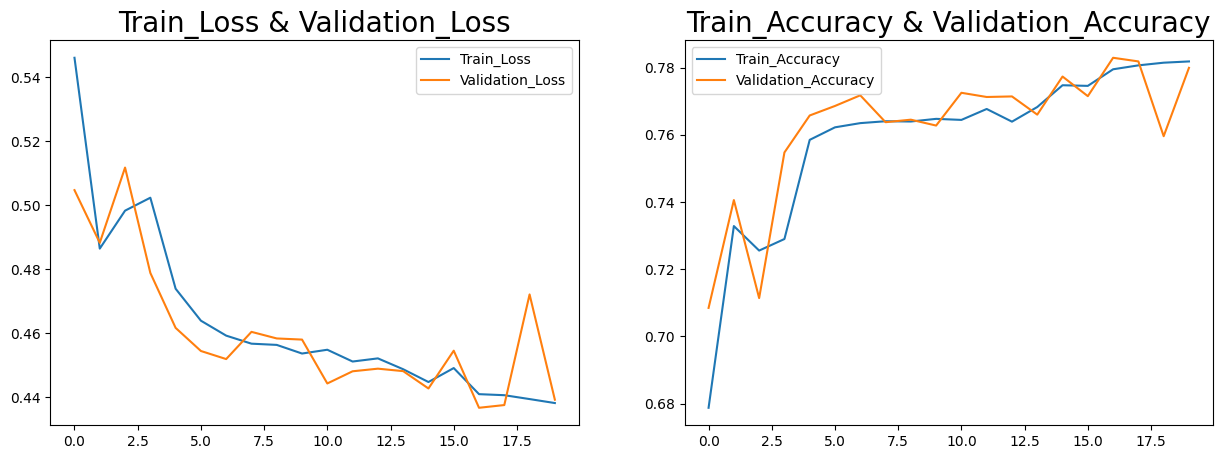

In [64]:
draw_hist()

In [65]:
evaluate(t_model)

804/804 [==============================] - 6s 6ms/step
Accuracy Score is :  0.782568093385214
F1 Score is :  0.7825680933852139
Recall Score is :  0.782568093385214
Precision Score is :  0.782568093385214


<center>
   <a id="9.3"></a>
  <h1 style="
      background: linear-gradient(45deg, #ff6347, #ffd700);
      color: #2c3e50;
      font-size: 40px;
      font-weight: bold;
      font-family: 'Arial', sans-serif;
      border: 4px solid #2c3e50;
      padding: 25px;
      border-radius: 15px;
      box-shadow: 0 8px 12px rgba(0, 0, 0, 0.2);
      margin: 30px 0;
  ">LSTM With Word Embeddings</h1>
</center>

In [66]:
feature=feature_f('word')
feature

array([[-0.00567665,  0.06066908,  0.05193835, ..., -0.04803498,
        -0.05021222, -0.03290236],
       [-0.01360516,  0.09120242,  0.04227077, ..., -0.0565911 ,
        -0.04332273, -0.04499935],
       [-0.00269482,  0.06083355,  0.045895  , ..., -0.05228714,
        -0.04762742, -0.02620196],
       ...,
       [-0.03511904,  0.04757387,  0.07361615, ..., -0.05292241,
        -0.03176353, -0.05338969],
       [-0.03928709,  0.09285609,  0.01285389, ..., -0.0743141 ,
        -0.1083255 , -0.0277536 ],
       [-0.01986735,  0.06927536,  0.02839638, ..., -0.05099655,
        -0.08970021, -0.03289123]])

In [67]:
feature,label=smote(feature)

In [68]:
X_train,X_test,y_train,y_test=split(feature,label)

X_train shape is  (59964, 200)
X_test shape is  (25700, 200)
y_train shape is  (59964,)
y_test shape is  (25700,)


In [69]:
w_model=LSTM_f(X_train)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 64)           12800     
                                                                 
 lstm_4 (LSTM)               (None, 200, 32)           12416     
                                                                 
 spatial_dropout1d_2 (Spati  (None, 200, 32)           0         
 alDropout1D)                                                    
                                                                 
 lstm_5 (LSTM)               (None, 32)                8320      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 33569 (131.13 KB)
Trainable params: 33569 (131.13 KB)
Non-trainable params: 0 (0.00 Byte)
________________

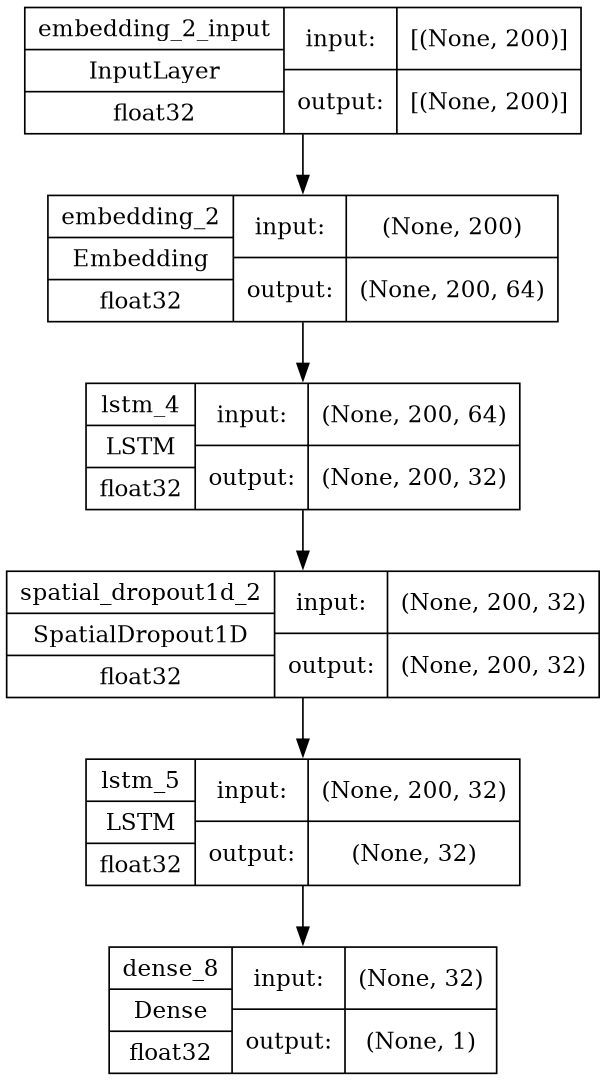

In [70]:
tf.keras.utils.plot_model(w_model, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=120)

In [71]:
checkpoint_cb =ModelCheckpoint('Word_LSTM.h5',monitor='val_loss', save_best_only=True)
early_stopping_cb =EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
hist=w_model.fit(X_train,y_train,batch_size=32,epochs=20,validation_split=.2,callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 29s 17ms/step - loss: 0.6934 - accuracy: 0.4983 - val_loss: 0.6932 - val_accuracy: 0.4980
Epoch 2/20
   9/1500 [..............................] - ETA: 21s - loss: 0.6932 - accuracy: 0.4861

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 25s 16ms/step - loss: 0.6932 - accuracy: 0.4996 - val_loss: 0.6932 - val_accuracy: 0.4980
Epoch 3/20
1500/1500 [==============================] - 25s 17ms/step - loss: 0.6932 - accuracy: 0.4997 - val_loss: 0.6932 - val_accuracy: 0.4980
Epoch 4/20
1500/1500 [==============================] - 25s 17ms/step - loss: 0.6932 - accuracy: 0.5037 - val_loss: 0.6932 - val_accuracy: 0.5020
Epoch 5/20
1500/1500 [==============================] - 25s 16ms/step - loss: 0.6932 - accuracy: 0.4984 - val_loss: 0.6931 - val_accuracy: 0.5020
Epoch 6/20
1500/1500 [==============================] - 25s 17ms/step - loss: 0.6932 - accuracy: 0.5014 - val_loss: 0.6932 - val_accuracy: 0.5020
Epoch 7/20
1500/1500 [==============================] - 25s 17ms/step - loss: 0.6932 - accuracy: 0.4977 - val_loss: 0.6932 - val_accuracy: 0.4980
Epoch 8/20
1500/1500 [==============================] - 25s 17ms/step - loss: 0.6932 - accuracy: 0.4968 - val_loss: 0.6932 - val_accura

<center>
   <a id="9.3.1"></a>
  <h1 style="
      background: linear-gradient(45deg, #ff6347, #ffd700);
      color: #2c3e50;
      font-size: 40px;
      font-weight: bold;
      font-family: 'Arial', sans-serif;
      border: 4px solid #2c3e50;
      padding: 25px;
      border-radius: 15px;
      box-shadow: 0 8px 12px rgba(0, 0, 0, 0.2);
      margin: 30px 0;
  ">Evaluation</h1>
</center>

In [72]:
hist_f()

,loss,accuracy,val_loss,val_accuracy
0,0.693362,0.498301,0.693154,0.498041
1,0.693218,0.499614,0.693179,0.498041
2,0.693235,0.499677,0.693190,0.498041
3,0.693178,0.503658,0.693193,0.501960
4,0.693207,0.498447,0.693147,0.501960
5,0.693177,0.501407,0.693157,0.501960
6,0.693199,0.497655,0.693164,0.498041
7,0.693186,0.496800,0.693175,0.498041
8,0.693189,0.497300,0.693175,0.498041
9,0.693179,0.498822,0.693140,0.501960


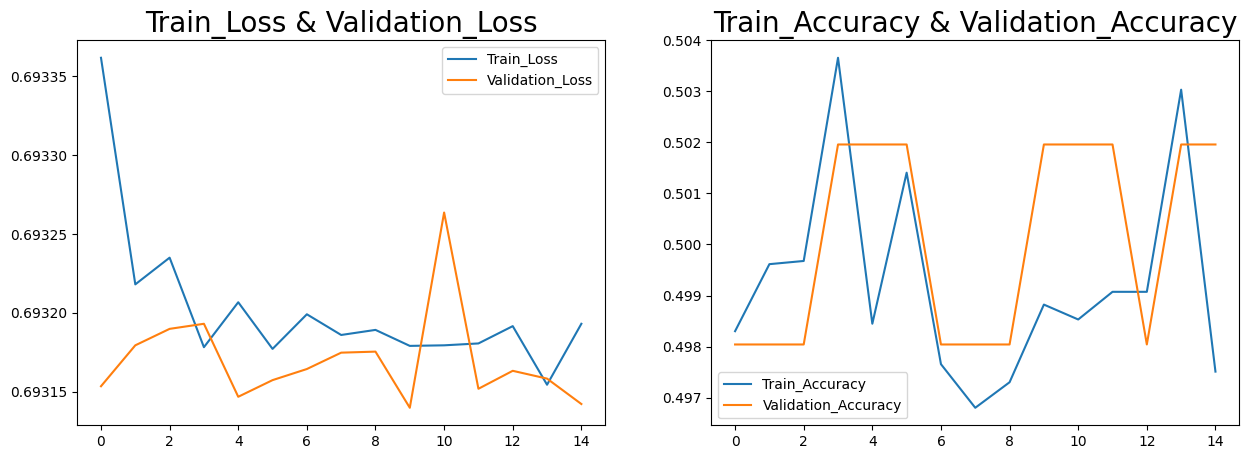

In [73]:
draw_hist()

In [74]:
evaluate(w_model)

804/804 [==============================] - 6s 7ms/step
Accuracy Score is :  0.5
F1 Score is :  0.5
Recall Score is :  0.5
Precision Score is :  0.5
